- [Chapter 2: Distributions](#chapter2)
    - [2.1 Histograms](#subchapter2.1)
    - [2.2 Representing histograms](#subchapter2.2)
    - [2.3 Plotting histograms](#subchapter2.3)
    - [2.4 NSFG variables](#subchapter2.4)
    - [2.5 Outliers](#subchapter2.5)
    - [2.6 First babies](#subchapter2.6)
    - [2.7 Summarizing distributions](#subchapter2.7)
    - [2.8 Variance](#subchapter2.8)
    - [2.9 Effect size](#subchapter2.9)
    - [2.10 Reporting results](#subchapter2.10)
    - [2.11 Exercises](#subchapter2.11)
    - [2.12 Glossary](#subchapter2.12)

<a id='chapter2'></a>
# Chapter 2: Distributions

<a id='subchapter2.1'></a>
## 2.1 Histograms

A good way to describe a variable is to get its <b>distribution</b>. The most common representation of this is a <b>Histogram</b>, which is a graph that shows the frequency of each value.

An efficient way to compute frequencies in python is by using a dictionary. The result is a dictionary that maps from values to frequencies. 

In [39]:
t = [1, 2, 2, 3, 8, 6]
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
hist

{1: 1, 2: 2, 3: 1, 6: 1, 8: 1}

Alternatively, you can use the Counter class defined in the <b>collections</b> module. The result is a Counter object, which is a subclass of dictionary.

In [40]:
from collections import Counter

counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 6: 1, 8: 1})

A third option is to use pandas method *value_counts*. 

In this book we'll use a class named <b>Hist</b> that represents histograms and provides the methods that operate them. You can view the class structure by loading the file *thinkstats2.py*

In [3]:
# Uncomment this next line of code to see the class Hist
# %load thinkstats2.py

<a id='subchapter2.2'></a>
## 2.2 Representing histograms

The Hist constructor can take a sequence, dictionary, pandas Series, or another histogram. You can instantiate a Hist object like this: 

In [4]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 8, 6])
hist

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Hist({8: 1, 1: 1, 2: 2, 3: 1, 6: 1})

You can get the frequency of a certain element by using Freq:

In [5]:
hist.Freq(2)
# or using square brackets:
hist[2]

2

The frequency of a value that does not appear will be 0:

In [6]:
hist.Freq(4)

0

In [7]:
# Values returns an unsorted list of the values in the Hist
hist.Values()

[8, 1, 2, 3, 6]

In [8]:
# To loop through the values in order - use the built in function sorted:
for val in sorted(hist.Values()):
    print val, hist[val]

print '\n'

# or use Items to iterate through value-frequency pairs:
for val, freq in hist.Items():
    print val, freq

1 1
2 2
3 1
6 1
8 1


8 1
1 1
2 2
3 1
6 1


<a id='subchapter2.3'></a>
## 2.3 Plotting histograms

The author of the book uses a module called *thinkplot.py* that provides functions for plotting Hists and other objects defined in *thinkstats2.py*. It is based on *pyplot*, which is part of the *matplotlib* package.

You can read the documentation for thinkplot [here](http://greenteapress.com/thinkstats2/thinkplot.html).

In [9]:
# We want our plots to be shown inline the notebook
%matplotlib inline

# Uncomment this next line of code if you want to take a look at the thinkplot module
# %load thinkplot.py

Import the module and take a look at what it does:

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


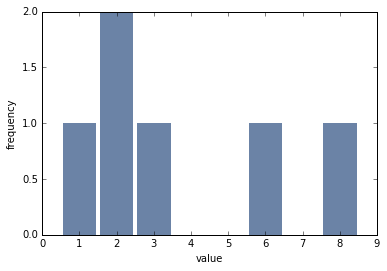

In [10]:
import thinkplot

thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

<a id='subchapter2.4'></a>
## 2.4 NSFG variables

When you get a new dataset, you should explore the variables you are planning to use one at a time. A good way to do this is by looking at histograms. 

Let's start by reading the data and selecting records for live births:

In [11]:
from __future__ import print_function

import math
import numpy as np

import nsfg

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Taking a quick look at the variables in the DataFrame can't hurt:

In [12]:
preg.shape

(13593, 244)

In [13]:
live.shape

(9148, 244)

While preg has 13,593 rows, the DataFrame live has 9,148. The reason is that the expression in brackets is a boolean Series that selects rows from the DataFrame and returns a new DataFrame. 

Let's generate and plot a histogram of birthwgt_lb for live births. When the argument passed to Hist is a panda Series, any NaN value is dropped.

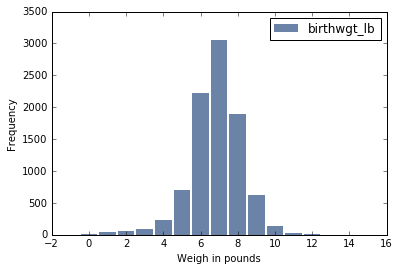

In [14]:
# label is a string that appers in the legend
hist_birthwgt_lb = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist_birthwgt_lb)
thinkplot.Show(xlabel='Weigh in pounds', ylabel='Frequency')

Let's examine this histogram:

- The most common value, called the <b>mode</b>, is 7 pounds.
- The distribution is approximately a <b>normal</b> or <b>Gaussian</b>.
- Unlike the normal distribution, this histogram has a <b>tail</b> that extends farther to the left than to the right.

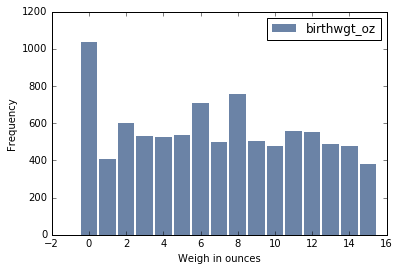

In [15]:
hist_birthwgt_oz = thinkstats2.Hist(live.birthwgt_oz, label='birthwgt_oz')
thinkplot.Hist(hist_birthwgt_oz)
thinkplot.Show(xlabel='Weigh in ounces', ylabel='Frequency')

When xamining the distribution of the ounces part of the birth weight, we expect it to be <b>uniform</b>, meaning all values should have the same frequency. But we see that 0 is the most common and 1 and 15 are less common (probably because respondents round off birth weights that are close to an integer value).

In [16]:
# age at the end of the pregnancy is in decimal values
live.agepreg.head()

0    33.16
1    39.25
2    14.33
3    17.83
4    18.33
Name: agepreg, dtype: float64

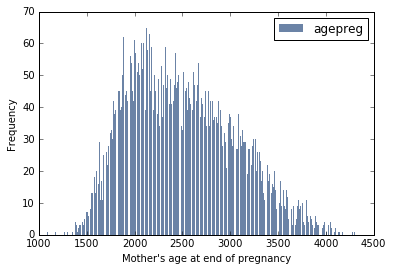

In [17]:
hist_agepreg = thinkstats2.Hist(np.floor(live.agepreg*100), label='agepreg')
thinkplot.Hist(hist_agepreg)
thinkplot.Show(xlabel='Mother\'s age at end of pregnancy', ylabel='Frequency')

The distribution of mother's ages at birth is roughly bell shaped, with the tail extended to the right. 

In [18]:
live.prglngth.head()

0    39
1    39
2    39
3    39
4    39
Name: prglngth, dtype: int64

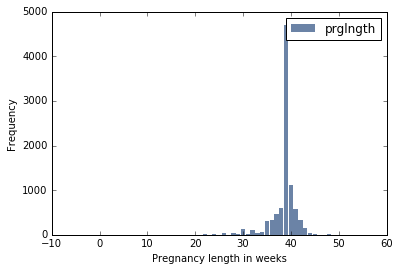

In [19]:
hist_prglngth = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist_prglngth)
thinkplot.Show(xlabel='Pregnancy length in weeks', ylabel='Frequency')

The left tail is longer than the right: early babies are common, but pregnancies seldoml pass 43 weeks. 

The most common pregnancy length is around 39 weeks. Or more precisely:

In [20]:
round(live.prglngth.mean(), 2)

38.56

<a id='subchapter2.5'></a>
## 2.5 Outliers

Histograms help us identify the most common values and the shape of the distribution, but rare values are not always visible. Before going on, it's a good idea to check for <b>outliers</b>, which are extreme values that might be errors in measurement and recording or accurate reports of rare events. 

Hist provides methods *Largest* and *Smallest*, which take an integer n and return the n largest or smallest values from the histogram:

In [21]:
for weeks, freq in hist_prglngth.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


Any values below 10 weeks in the pregnancy length variable are definitly errors. Above 30 is legitimate. Between 10 and 30 - hard to say.

In [22]:
for weeks, freq in hist_prglngth.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


Most doctors recommend induces if a pregnancy exceeds 42 weeks, so some of the values seem unlikely. 

In order to find the outliers, it is best to have at least sone "domain knowlage" (information about the data and what they mean). 

When attempting to answer the question "do first babies arrive early/ late?", we will examine pregnancies that lasted 27-46 weeks, and assume the rest are outliers. 

<a id='subchapter2.6'></a>
## 2.6 First babies

We first want to compare the distribution of pregnancy lengths for first babies and others. We devide the DataFrame of live births using birthord, and compute their histograms:

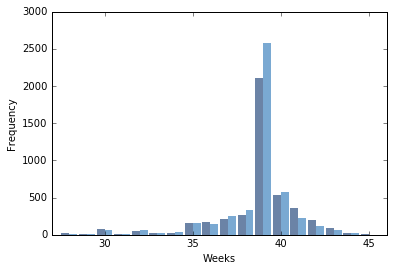

In [23]:
first_babies = live[live.birthord == 1]
other_babies = live[live.birthord != 1]

first_hist = thinkstats2.Hist(first_babies.prglngth)
other_hist = thinkstats2.Hist(other_babies.prglngth)

# We want to plot the histograms on the same axix:
# Both bars will be of width 0.9, which will leave some space to tell the different sections appart
width = 0.45
# PrePlot takes the number of histograms we plan to plot and chooses appropriate colors
thinkplot.PrePlot(2)

# Default alignment is 'center', bun since we want to compare the two - we'll use both sides
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)

thinkplot.Show(xlabel='Weeks', ylabel='Frequency', xlim=[27,46])

Notice that since there are fewer "first babies" than "others", some of the apparen differences in the histograms are due to sample size.

<a id='subchapter2.7'></a>
## 2.7 Summarizing distributions

If the details of the distribution are important, it might be necessary to present a histogram. But often we want to summarize the distribution with a few descriptive statistics.

<b>Summary statistics</b> are statistics designed to answer these questions. 

- <b>central tendency</b>: Do the values tend to cluster around a particular point?
- <b>modes</b>: modes: Is there more than one cluster?
- <b>spread</b>: How much variablity is there in the values?
- <b>tails</b>: How quickly do the probabilities drop off as we move away from the modes?
- <b>outliers</b>: Are there extreme values far from the modes?

The most common is the <b>mean</b>, which is meant to describe the central tendency of the distribution. 

If you have a sample of n values, $x_{i}$, the mean, $\bar{x}$, is:

$$\bar{x}=\frac{1}{n}\sum_i(x_{i})$$

When the variance of the values is large, the mean is meaningless. When the mean does not represent the typical value [usually since there is no typical], the variance can help us get a better view on the values. 

<a id='subchapter2.8'></a>
## 2.8 Variance

Variance is intended to describe the variability or spread of a distribution. 

The vaiance of a set of values is:

$$S^2=\frac{1}{n}\sum_i(x_{i}-\bar{x})^2$$

The term $x_{i}-\bar{x}$ is called "deviation of the mean", so variance is the mean squared deviation. The square root of the variance, $S$, is the standard deviation (in statistics used to estimate variance in a population using a sample - the formula for the variance is devided by $n-1$.

In [24]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()
print('\nMean: ', mean, '\nVariance: ', var, '\nStd: ' ,std)


Mean:  38.5605596852 
Variance:  7.30266206783 
Std:  2.70234381007


The meaning of these values is that we should expect deviations of 2-3 weeks to be common.

<a id='subchapter2.9'></a>
## 2.9 Effect size

An <b>effect size</b> is a summary statistic intended to describe the size of an effect. For example, mean pregnancy length for first babies is 38.601; For other babies it's 38.523. The difference is 0.078 weeks, which is 13 hours. As a fraction of a typical pregnancy length, this difference is about 0.2%. 

In order to convey the size of the effect we can compare the difference between groups to the variability within groups. Cohen's $d$ is a statistic intended to do that. It is defined: 

$$d = \frac{\bar{x_1}-\bar{x_2}}{S}$$

Where $\bar{x_1}$ and $\bar{x_2}$ are the means of the groups and $S$ is the "pooled standard deviation". In order to do this in python: 

In [35]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [26]:
group1 = live[live.birthord == 1].prglngth
group2 = live[live.birthord != 1].prglngth
CohenEffectSize(group1, group2)

0.028879044654449883

In this example the differences in means is 0.029 standard deviations, which is small. 

<a id='subchapter2.10'></a>
## 2.10 Reporting results

The answer to the question "How to report these results?" depends on who's asking the question. A scientist, a doctor or a pregnant woman may be interested in different significance and details. The report also depends on the goals of the researcher and should be guided by professional ethics. The reports and visualizations should tell a story clearly, while being honest, and should acknowledge uncertainty and limitations. 

Take a few moments, and answer this next question before moving on the the exercises below: 

Suppose you were asked to summarize what you learned about whether first babies arrive late based on the results in this chapter. Write a paragraph that uses the results shown here to answer the question clearly, precisely, and honestly.

Post your answer here: 

<i>When trying to answer the question "Do first babies arrive late?" we used data taken from the National Survey of Family Growth (NSFG), a survey conducted by the U.S. Centers for Disease Control and Prevention (CDC). Their 2002 dataset includes 7643 women, who reported the gestational age for their 9148 live births. 

When looking at the distribution of pregnancy length, we see that the distributions are similar for first babies and others.  The mode is 39 weeks; the distribution is skewed to the left, with some births as early as 24 weeks, but almost none later than 44 weeks. On average, first babies are 0.078 weeks later than others.  This difference, 13 hours, is not statistically significant.</i>

<a id='subchapter2.11'></a>
## 2.11 Exercises

Open the exercises in the links below. Some cells are already filled in, and you should execute them. Other cells give you instructions for exercises you should try.

<b>Exercise 2.1</b>

[Exercise 1](chap02ex01.ipynb)

[Exercise 1 solution](chap02ex01soln.ipynb)

<b>Exercise 2.3</b>

[Exercise 2](chap02ex02.ipynb)

[Exercise 2 solution](chap02ex02soln.ipynb)


<a id='subchapter2.12'></a>
## 2.12 Glossary

<b>Distribution</b>: The values that appear in a sample and the frequency of each.

<b>Histogram</b>: A mapping from values to frequencies, or a graph that shows this mapping.

<b>Frequency</b>: The number of times a value appears in a sample.

<b>Mode</b>: The most frequent value in a sample, or one of the most fre- quent values

<b>Normaldistribution</b>:Anidealizationofabell-shapeddistribution;also known as a Gaussian distribution.

<b>Uniform distribution</b>: A distribution in which all values have the same frequency.

<b>Tail</b>: The part of a distribution at the high and low extremes.

<b>Central tendency</b>: A characteristic of a sample or population; intu- itively, it is an average or typical value.

<b>Outlier</b>: A value far from the central tendency.

<b>Spread</b>: A measure of how spread out the values in a distribution are.

<b>Summary statistic</b>: A statistic that quantifies some aspect of a distribu- tion, like central tendency or spread.

<b>Variance</b>: A summary statistic often used to quantify spread.

<b>Standard deviation</b>: The square root of variance, also used as a mea- sure of spread.

<b>Effect size</b>: A summary statistic intended to quantify the size of an effect like a difference between groups.

<b>Clinically significant</b>: A result, like a difference between groups, that is relevant in practice.

Next up: [Chapter 3: Probability mass functions](chap03.ipynb)